In [1]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

import genutils
import os
import sys
import numpy as np
import re
import scipy 
import matplotlib.patches as patches


/home/jmkidd/kidd-lab/progs/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
#Out directory for generated plots
plotDir = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/GenomePlots/'

#Non-overlap, Total callset
noTotal = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/Total_54callset_MxbRemoved/NoSliding/AutoXPar/village_wolf_mxb_rm_54callset_autoXpar_Hudson_Fst_200kbWindow.txt_filtered_windows_RofA_Fst_Zscores.txt'
#Overlap, Total callset
overTotal = '/home/jmkidd/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/Total_54callset_MxbRemoved/Sliding/AutoXPar/village_wolf_mxb_rm_54callset_autoXpar_Hudson_Fst_200kbWindow_50kbSlide.txt_filtered_windows_RofA_Fst_Zscores.txt'
#Per Site, Total callset
perTotal = '/home/jmkidd/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/Total_54callset_MxbRemoved/PerSite/Merged_VillageWolf_mxb_rm_PERSITE_54callset_AutoXParXNonPar_Hudson_Fst_PerSite_Zscores.txt'

#Reading into file array
fileArray = []
fileArray = [noTotal,overTotal,perTotal]

In [28]:
def find_gene_pos():
    #GTF file with genes of interest:
    gtfFile = open('/home/jmkidd/kidd-lab/ampend-projects/BLAST2GO/ensembl_input/Canis_familiaris.CanFam3.1.81.gtf','r')

    #YOU NEED TO DO THIS BY HAND BY GREP'ING THE GTF FILE:
    #genesOfInterest = ['ENSCAFG00000028653','RNPC3','COL11A1']
    genesOfInterest = []
    genePos = []

    for line in gtfFile:
        if '#' in line:
            continue
        line=line.rstrip().split('\t')
        if 'exon' not in line[2]:
            continue
        chrom = 'chr' + line[0]
        start = int(line[3])
        end = int(line[4])
        if chrom == ROIchrom:
            if start >= ROIstart and end <= ROIend:
                #Finding gene ID in line
                geneInfo = line[8]
                if 'gene_name' in geneInfo:
                    geneInfo = geneInfo.split(';')
                    geneInfo = geneInfo[5].split(' ')
                    geneID = geneInfo[2].replace('"','')
                else:
                    geneInfo = geneInfo.split(';')
                    geneInfo = geneInfo[0].split(' ')
                    geneID = geneInfo[1].replace('"','')
                """for i in genesOfInterest:
                    if geneID == i:
                        genePos.append([geneID,start,end])"""
                if geneID not in genesOfInterest:
                    genesOfInterest.append(geneID)
                genePos.append([geneID,start,end])
            else:
                continue
        else:
            continue
    gtfFile.close()
    return genesOfInterest,genePos

In [35]:
##LONG## 
def get_data():
    index=-1
    for file in fileArray:
        index += 1
        inFile = open(file,'r')
        for line in inFile:
            if 'Chrom' in line or 'CHROM' in line:
                continue
            line = line.rstrip().split('\t')
            if 'PerSite' in file:
                chrom,start,end,Z = line[0],int(line[1]),int(line[1]),float(line[3])
            else:
                chrom,start,end, Z = line[0],int(line[1]),int(line[2]),float(line[9])
            #Now check if the call is within the ROI
            if chrom == ROIchrom and start >= ROIstart and end <= ROIend:
                if '50kbSlide' in file: #OVERLAP WINDOW FILE
                    midpoint = float(start + end)/2
                    SlideArray.append([chrom,midpoint,Z])
                    continue
                if 'PerSite' in file: #PER SITE WINDOW FILE
                    perSiteArray.append([chrom,start,Z])
                    continue
                else: #NO OVERLAP WINDOW FILE
                    midpoint = float(start + end)/2
                    NoSlideArray.append([chrom,midpoint,Z])
                    continue                
                #outFile.write('%s\t%s\t%s\t%s\n' % (chrom,start,end,Z)) 
        inFile.close()
    return SlideArray,perSiteArray,NoSlideArray

In [175]:
#PROCESSING CDR8 = AMY2B LOCUS
ROI = 'chr6:46500000-47500000'
ROIchrom,pos = ROI.split(':')
ROIstart,ROIend = pos.split('-')
ROIstart,ROIend = int(ROIstart),int(ROIend)
print 'Looking for the Fst information for these coordinates:',ROIchrom,ROIstart,ROIend

#Finding genes in the region
genesOfInterest = []
genePos = []
genesOfInterest,genePos = find_gene_pos()

print '\nGenes of Interest in Region of Interest:\n', genesOfInterest

Looking for the Fst information for these coordinates: chr6 46500000 47500000


In [179]:
#GTF file with genes of interest:
gtfFile = open('/home/jmkidd/kidd-lab/ampend-projects/BLAST2GO/ensembl_input/Canis_familiaris.CanFam3.1.81.gtf','r')

#YOU NEED TO DO THIS BY HAND BY GREP'ING THE GTF FILE:
#genesOfInterest = ['ENSCAFG00000028653','RNPC3','COL11A1']
genesOfInterest = []
genePos = []

for line in gtfFile:
    if '#' in line:
        continue
    line=line.rstrip().split('\t')
    if 'exon' not in line[2]:
        continue
    chrom = 'chr' + line[0]
    start = int(line[3])
    end = int(line[4])
    if chrom == ROIchrom:
        if start >= ROIstart and end <= ROIend:
            #Finding gene ID in line
            geneInfo = line[8]
            if 'gene_name' in geneInfo:
                geneInfo = geneInfo.split(';')
                geneInfo = geneInfo[5].split(' ')
                geneID = geneInfo[2].replace('"','')
            else:
                geneInfo = geneInfo.split(';')
                geneInfo = geneInfo[0].split(' ')
                geneID = geneInfo[1].replace('"','')
            """for i in genesOfInterest:
                if geneID == i:
                    genePos.append([geneID,start,end])"""
            if geneID not in genesOfInterest:
                genesOfInterest.append(geneID)
            genePos.append([geneID,start,end])
        else:
            continue
    else:
        continue
gtfFile.close()

In [ ]:
"""outDir = plotDir + 'AMY2B/'
outFileArray = [outDir + 'NoSliding_AMY2B.bed', outDir + 'Sliding_AMY2B.bed', outDir+'PerSite_AMY2B.bed']
index=-1

perSiteZArray = []
SlideArray = []
NoSlideArray = []

for file in fileArray:
    index += 1
    inFile = open(file,'r')
    outFile = open(outFileArray[index],'w')
    for line in inFile:
        if 'Chrom' in line or 'CHROM' in line:
            continue
        line = line.rstrip().split('\t')
        if 'PerSite' in file:
            chrom,start,end,Z = line[0],int(line[1]),int(line[1]),float(line[3])
        else:
            chrom,start,end, Z = line[0],int(line[1]),int(line[2]),float(line[9])
        #Now check if the call is within the ROI
        if chrom == ROIchrom and start >= ROIstart and end <= ROIend:
            outFile.write('%s\t%s\t%s\t%s\n' % (chrom,start,end,Z))    """

In [7]:
##LONG## 
outDir = plotDir + 'AMY2B/'
index=-1

perSiteArray, SlideArray, NoSlideArray = [] , [], []

for file in fileArray:
    index += 1
    inFile = open(file,'r')
    for line in inFile:
        if 'Chrom' in line or 'CHROM' in line:
            continue
        line = line.rstrip().split('\t')
        if 'PerSite' in file:
            chrom,start,end,Z = line[0],int(line[1]),int(line[1]),float(line[3])
        else:
            chrom,start,end, Z = line[0],int(line[1]),int(line[2]),float(line[9])
        #Now check if the call is within the ROI
        if chrom == ROIchrom and start >= ROIstart and end <= ROIend:
            if '50kbSlide' in file: #OVERLAP WINDOW FILE
                midpoint = float(start + end)/2
                SlideArray.append([chrom,midpoint,Z])
                continue
            if 'PerSite' in file: #PER SITE WINDOW FILE
                perSiteArray.append([chrom,start,Z])
                continue
            else: #NO OVERLAP WINDOW FILE
                midpoint = float(start + end)/2
                NoSlideArray.append([chrom,midpoint,Z])
                continue                
            #outFile.write('%s\t%s\t%s\t%s\n' % (chrom,start,end,Z))    

In [150]:
import random 
#THIS THINS THE MASSIVE LIST OF PER SITE ZFST VALUES
percentage = float(50)
k = int(len(perSiteArray) * percentage // 100)
indices = random.sample(xrange(len(perSiteArray)), k)
thinned_perSiteArray = [perSiteArray[i] for i in indices]

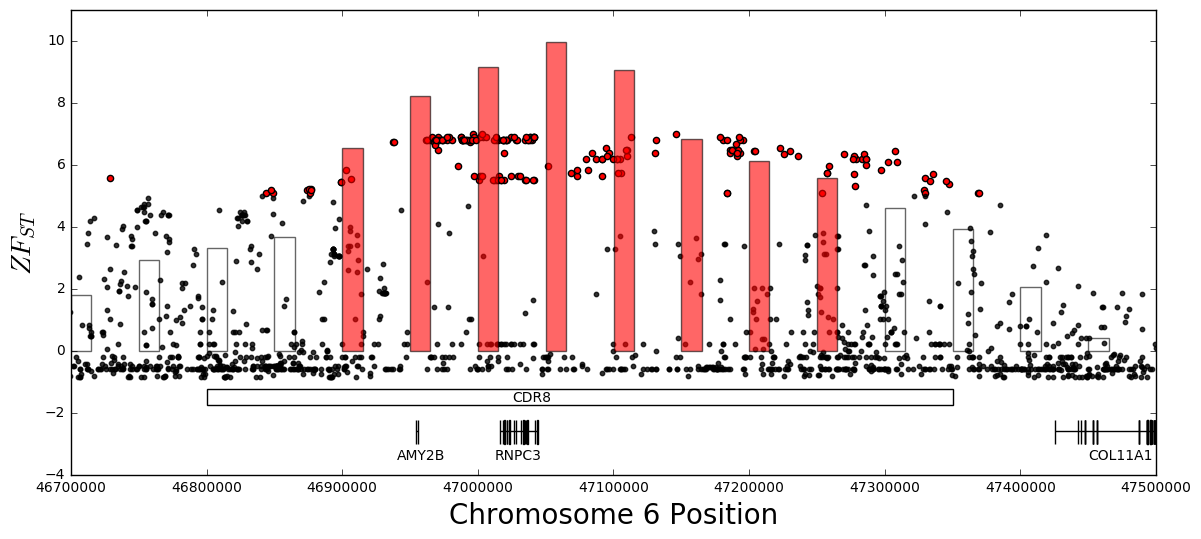

In [220]:
plt.figure(figsize=(14,6))

for i in range(0,len(SlideArray)):
    x = SlideArray[i][1]
    y = SlideArray[i][2]
    if x > 47500000:
        continue
    width = 15000
    if y > 5:
        plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
    else:
        plt.bar(x, y, width, fill=False,alpha=0.6,linewidth=1)


"""for i in range(0,len(NoSlideArray)):
    x = NoSlideArray[i][1]-15000
    y = NoSlideArray[i][2]
    if x > 47500000:
        continue
    width = 15000
    if y > 5:
        plt.bar(x, y, width, color="red",alpha=0.6,hatch='//')
    else:
        plt.bar(x, y, width, fill=False,alpha=0.6,hatch='//')
"""        
for i in range(0,len(thinned_perSiteArray)):
    x = thinned_perSiteArray[i][1]
    y = thinned_perSiteArray[i][2]
    if x > 47500000:
        continue
    if y > 5:
        plt.scatter(x,y,facecolor='red',edgecolor='k',s=20)
    else:
        plt.scatter(x,y,color='black',alpha=0.8,s=10)

plt.ylim(-4,11)
plt.xlim(46700000,47500000)
ax = plt.axes()

mp = []
for gene in genesOfInterest:
    xRange = []
    for i in range(0,len(genePos)):
        if gene == genePos[i][0]:
            x = genePos[i][1]
            length = genePos[i][2]-genePos[i][1]
            ax.add_patch(patches.Rectangle((x, -3),length,0.75,facecolor="black"))
            xRange.append(x)
    xMin,xMax = min(xRange),max(xRange)
    plt.hlines(y=-2.6, xmin=xMin, xmax=xMax,lw=1,color="black")
    midpoint = np.mean(xRange)
    mp.append(midpoint)

plt.xlabel('Chromosome 6 Position',fontsize=20)
plt.ylabel(r'$ZF_{ST}$',fontsize=20)

#Add gene IDs
#MANUAL
ax.text(46940000,-3.5,'AMY2B')
ax.text(47012000,-3.5,'RNPC3')
ax.text(47450000,-3.5,'COL11A1')
#Add CDR8 window
CDR8 = [46800001,47350000]
ax.add_patch(patches.Rectangle((CDR8[0], -1.75),(CDR8[1]-CDR8[0]),0.5,fill=None))
ax.text(47025000, -1.65,'CDR8')
#turn off sci-notation in  xaxis labelling
ax.ticklabel_format(useOffset=False,style='plain') 

plt.savefig(outDir + 'AMY2B_Locus_ZFstPlotWithGeneModels.png')

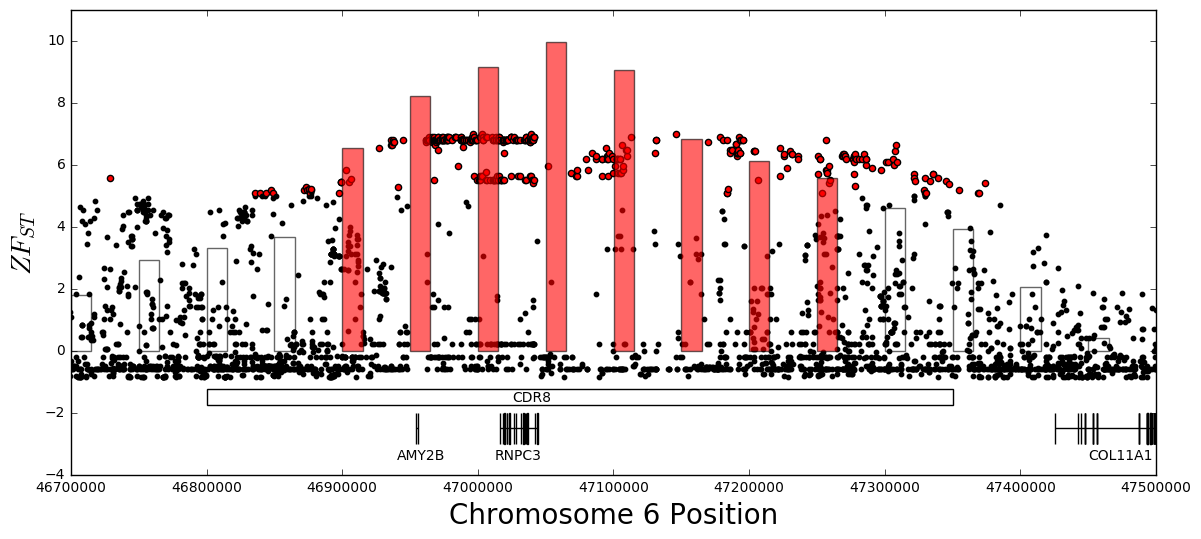

In [217]:
plt.figure(figsize=(14,6))

for i in range(0,len(SlideArray)):
    x = SlideArray[i][1]
    y = SlideArray[i][2]
    if x > 47500000:
        continue
    width = 15000
    if y > 5:
        plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
    else:
        plt.bar(x, y, width, fill=False,alpha=0.6,linewidth=1)

for i in range(0,len(perSiteArray)):
    x = perSiteArray[i][1]
    y = perSiteArray[i][2]
    if x > 47500000:
        continue
    if y > 5:
        plt.scatter(x,y,facecolor='red',edgecolor='k',s=20)
    else:
        plt.scatter(x,y,color='black',s=10)

plt.ylim(-4,11)
plt.xlim(46700000,47500000)
ax = plt.axes()

mp = []
for gene in genesOfInterest:
    xRange = []
    for i in range(0,len(genePos)):
        if gene == genePos[i][0]:
            x = genePos[i][1]
            length = genePos[i][2]-genePos[i][1]
            ax.add_patch(patches.Rectangle((x, -3),length,0.75,facecolor="black"))
            xRange.append(x)
    xMin,xMax = min(xRange),max(xRange)
    plt.hlines(y=-2.6, xmin=xMin, xmax=xMax,lw=1,color="black")
    midpoint = np.mean(xRange)
    mp.append(midpoint)

plt.xlabel('Chromosome 6 Position',fontsize=20)
plt.ylabel(r'$ZF_{ST}$',fontsize=20)

#Add gene IDs
#MANUAL
ax.text(46940000,-3.5,'AMY2B')
ax.text(47012000,-3.5,'RNPC3')
ax.text(47450000,-3.5,'COL11A1')
#Add CDR8 window
CDR8 = [46800001,47350000]
ax.add_patch(patches.Rectangle((CDR8[0], -1.75),(CDR8[1]-CDR8[0]),0.5,fill=None))
ax.text(47025000, -1.65,'CDR8')
#turn off sci-notation in  xaxis labelling
ax.ticklabel_format(useOffset=False,style='plain') 

plt.savefig(outDir + 'AMY2B_Locus_ZFstPlotWithGeneModels_NoPerSiteThinning.png')

In [36]:
#PROCESSING CDR20 = MGAM LOCUS

ROI = 'chr16:7050001-7400000'
ROIchrom,pos = ROI.split(':')
ROIstart,ROIend = pos.split('-')
ROIstart,ROIend = int(ROIstart)-100000,int(ROIend)+100000
print 'Looking for the Fst information for these coordinates:',ROIchrom,ROIstart,ROIend

#Finding genes in the region
genesOfInterest = []
genePos = []
genesOfInterest,genePos = find_gene_pos()

print '\nGenes of Interest in Region of Interest:\n', genesOfInterest

#Get the data:
outDir = plotDir + 'CDR20/'
perSiteArray, SlideArray, NoSlideArray = [] , [], []
SlideArray,perSiteArray,NoSlideArray = get_data()
print '\n%i data points in Sliding (Overlapping) Fst data' % (len(SlideArray))
print '%i data points in No Sliding (Non-Overlapping) Fst data' % (len(NoSlideArray))
print '%i data points in Per Site Fst data' % (len(perSiteArray))

Looking for the Fst information for these coordinates: chr16 6950001 7500000

Genes of Interest in Region of Interest:
['TRBV3-1', 'ENSCAFG00000003818', 'ENSCAFG00000003820', 'PRSS58', 'ENSCAFG00000003827', 'ENSCAFG00000029181', 'ENSCAFG00000030973', 'ENSCAFG00000030631', 'MGAM2', 'MGAM', 'TAS2R38', 'CLEC5A', 'ENSCAFG00000003655', 'ENSCAFG00000003876', 'PRSS37', 'ENSCAFG00000003879', 'U6', 'TAS2R5', 'TAS2R3', 'SSBP1', 'WEE2']

8 data points in Sliding (Overlapping) Fst data
2 data points in No Sliding (Non-Overlapping) Fst data
1807 data points in Per Site Fst data


In [24]:
import random 
#THIS THINS THE MASSIVE LIST OF PER SITE ZFST VALUES
percentage = float(50)
k = int(len(perSiteArray) * percentage // 100)
indices = random.sample(xrange(len(perSiteArray)), k)
thinned_perSiteArray = [perSiteArray[i] for i in indices]

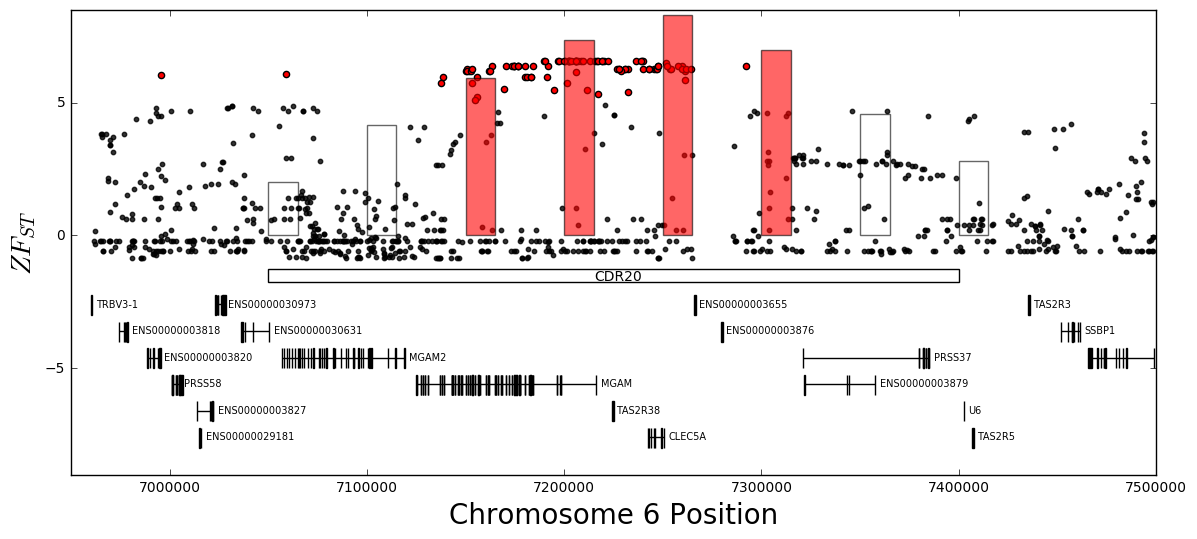

In [60]:
plt.figure(figsize=(14,6))

for i in range(0,len(SlideArray)):
    x = SlideArray[i][1]
    y = SlideArray[i][2]
    if x > 47500000:
        continue
    width = 15000
    if y > 5:
        plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
    else:
        plt.bar(x, y, width, fill=False,alpha=0.6,linewidth=1)


"""for i in range(0,len(NoSlideArray)):
    x = NoSlideArray[i][1]-15000
    y = NoSlideArray[i][2]
    if x > 47500000:
        continue
    width = 15000
    if y > 5:
        plt.bar(x, y, width, color="red",alpha=0.6,hatch='//')
    else:
        plt.bar(x, y, width, fill=False,alpha=0.6,hatch='//')
"""        
for i in range(0,len(thinned_perSiteArray)):
    x = thinned_perSiteArray[i][1]
    y = thinned_perSiteArray[i][2]
    if y > 5:
        plt.scatter(x,y,facecolor='red',edgecolor='k',s=20)
    else:
        plt.scatter(x,y,color='black',alpha=0.8,s=10)

#DEFINING AXIS LIMS
plt.ylim(-9,8.5)
plt.xlim(ROIstart,ROIend)
ax = plt.axes()
#DRAwING GENE MODELS
mp = []
IDheights=[-3.5,-4.5,-5.5,-6.5,-7.5,-8.5]
geneheights=[-3,-4,-5,-6,-7,-8]
index = -1
for gene in genesOfInterest:
    xRange = []
    #determines height to print the genes and gene IDs
    if index == 5:
        index = 0
    else:
        index += 1
    for i in range(0,len(genePos)):
        if gene == genePos[i][0]:
            x = genePos[i][1]
            length = genePos[i][2]-genePos[i][1]
            #ax.add_patch(patches.Rectangle((x, -3),length,0.75,facecolor="black"))
            ax.add_patch(patches.Rectangle((x,geneheights[index]),length,0.75,facecolor="black"))
            xRange.append(x)
    xMin,xMax = min(xRange),max(xRange)
    #plt.hlines(y=-2.6, xmin=xMin, xmax=xMax,lw=1,color="black")
    plt.hlines(y=geneheights[index]+0.4, xmin=xMin, xmax=xMax,lw=1,color="black")
    midpoint = np.mean(xRange)
    mp.append(midpoint)
    #ADDING GENE TEXT
    if 'ENSCAFG' in gene:
        gene = gene.replace('ENSCAFG','ENS')
    if xMax < ROIend-10000: #Make sure the gene ID doesn't get printed off the plot
        ax.text(xMax+2500,geneheights[index]+0.3,gene,fontsize=7)
#ADDING TITLES
plt.xlabel('Chromosome 6 Position',fontsize=20)
plt.ylabel(r'$ZF_{ST}$',fontsize=20)

#Add CDR20 window
CDR20 = [ROIstart+100000,ROIend-100000]
ax.add_patch(patches.Rectangle((CDR20[0], -1.75),(CDR20[1]-CDR20[0]),0.5,fill=None))
ax.text(((ROIstart+ROIend)/2-10000), -1.7,'CDR20')
#turn off sci-notation in  xaxis labelling
ax.ticklabel_format(useOffset=False,style='plain') 

plt.savefig(outDir + 'CDR20_Locus_ZFstPlotWithGeneModels.png')